In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
ss = StandardScaler()

In [11]:
Scaled_array = ss.fit_transform(df.drop('TARGET CLASS',axis=1))

In [12]:
X = pd.DataFrame(data = Scaled_array, index=df.index, columns=df.columns[:-1])

In [14]:
Y= df['TARGET CLASS']

In [16]:
df.corr()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,1.000000,-0.004816,-0.014219,0.055256,0.003688,0.001883,-0.023526,0.032118,-0.016091,0.026222,-0.079896
GWYH,-0.004816,1.000000,-0.224859,0.121623,-0.104795,0.042529,-0.102221,0.061553,0.039728,0.105532,-0.416168
TRAT,-0.014219,-0.224859,1.000000,-0.037726,0.124870,0.005462,0.118736,-0.073203,-0.067177,-0.119816,0.489347
TLLZ,0.055256,0.121623,-0.037726,1.000000,-0.005545,-0.004792,-0.063989,0.053958,0.094121,0.065143,-0.172029
IGGA,0.003688,-0.104795,0.124870,-0.005545,1.000000,0.003631,0.076304,-0.042134,-0.011688,-0.066895,0.295390
HYKR,0.001883,0.042529,0.005462,-0.004792,0.003631,1.000000,-0.007452,0.004891,0.025553,-0.006403,-0.015266
EDFS,-0.023526,-0.102221,0.118736,-0.063989,0.076304,-0.007452,1.000000,-0.071361,0.005865,-0.047928,0.281607
GUUB,0.032118,0.061553,-0.073203,0.053958,-0.042134,0.004891,-0.071361,1.000000,0.011507,0.061170,-0.174496
MGJM,-0.016091,0.039728,-0.067177,0.094121,-0.011688,0.025553,0.005865,0.011507,1.000000,0.014342,-0.098887
JHZC,0.026222,0.105532,-0.119816,0.065143,-0.066895,-0.006403,-0.047928,0.061170,0.014342,1.000000,-0.301725


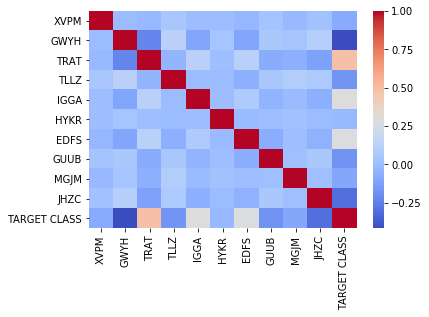

In [21]:

sns.heatmap(df.corr(), cmap='coolwarm')

In [22]:
df.drop(['HYKR','MGJM'], axis=1, inplace=True)

In [23]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,EDFS,GUUB,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,2147.641254,330.727893,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,853.404981,447.157619,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,818.676686,845.491492,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,852.867810,341.664784,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,905.469453,658.118202,1899.850792,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
y_pred=knn.predict(x_test)

In [35]:
np.mean(y_pred!=y_test)

0.19

In [43]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
    

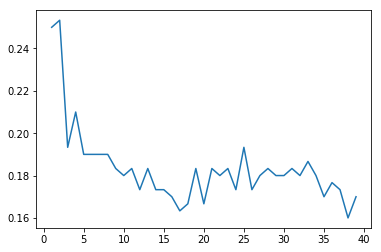

In [45]:
sns.lineplot(x= range(1,40), y = error_rate)

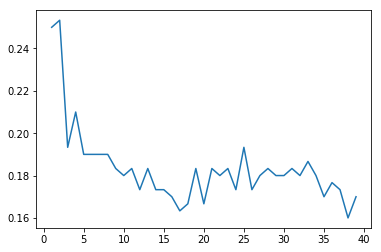

In [47]:
plt.plot(range(1,40),error_rate,)